In [1]:
import pandas as pd

In [2]:
!pip install tensorflow==2.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 25.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0

In [3]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("/kaggle/input/amazon-food/preprocessed_reviews.csv")

In [5]:
d = {1:0,2:0,3:0,4:2,5:2}

df["Label"] = df["Score"].apply(lambda x :d[x])

In [6]:
df["Label"].value_counts()

Label
2    443756
0    124645
Name: count, dtype: int64

In [7]:
df

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label,Preprocessed Review
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2,bought several vitality canned dog food produc...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanuts p...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2,confection around centuries light pillowy citr...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2,great taffy great price wide assortment yummy ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568396,568396,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2,great sesame chicken good better resturants ea...
568397,568397,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0,disappointed flavor chocolate notes especially...
568398,568398,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2,stars small give one training session tried tr...
568399,568399,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2,best treats training rewarding dog good groomi...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568401 entries, 0 to 568400
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   index                   568401 non-null  int64 
 1   Id                      568401 non-null  int64 
 2   ProductId               568401 non-null  object
 3   UserId                  568401 non-null  object
 4   ProfileName             568401 non-null  object
 5   HelpfulnessNumerator    568401 non-null  int64 
 6   HelpfulnessDenominator  568401 non-null  int64 
 7   Score                   568401 non-null  int64 
 8   Time                    568401 non-null  int64 
 9   Summary                 568401 non-null  object
 10  Text                    568401 non-null  object
 11  Label                   568401 non-null  int64 
 12  Preprocessed Review     567040 non-null  object
dtypes: int64(7), object(6)
memory usage: 56.4+ MB


In [9]:
df.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Label
count,568401.000000,568401.000000,568401.000000,568401.000000,568401.000000,5.684010e+05,568401.000000
mean,284200.000000,284228.120582,1.743903,2.227911,4.183297,1.296261e+09,1.561419
std,164083.379516,164098.955187,7.636845,8.288820,1.310376,4.803804e+07,0.827533
min,0.000000,1.000000,0.000000,0.000000,1.000000,9.393408e+08,0.000000
25%,142100.000000,142116.000000,0.000000,0.000000,4.000000,1.271290e+09,2.000000
50%,284200.000000,284225.000000,0.000000,1.000000,5.000000,1.311120e+09,2.000000
75%,426300.000000,426342.000000,2.000000,2.000000,5.000000,1.332720e+09,2.000000
max,568400.000000,568454.000000,866.000000,923.000000,5.000000,1.351210e+09,2.000000


In [10]:
df.isnull().sum()

index                        0
Id                           0
ProductId                    0
UserId                       0
ProfileName                  0
HelpfulnessNumerator         0
HelpfulnessDenominator       0
Score                        0
Time                         0
Summary                      0
Text                         0
Label                        0
Preprocessed Review       1361
dtype: int64

In [11]:
df["Score"].value_counts()

Score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

In [12]:
df["Text"][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [13]:
df["Summary"][0]

'Good Quality Dog Food'

In [14]:
df= df.dropna()

In [15]:
df.reset_index(inplace=True)

In [16]:
df = df.drop(["index"],axis=1)

In [17]:
duplicate_rows = df[df.duplicated()]
print('Number of duplicate tweets : ',len(duplicate_rows))

Number of duplicate tweets :  0


## Text Preprocessing

In [18]:
!pip install bs4

In [19]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
from bs4 import BeautifulSoup
def preprocessed(review): 
    sentance = re.sub(r"http\S+", "", review)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords.words('english'))
    return sentance.strip()

In [22]:
print("Review : ",df["Text"][0],"\n")
print("Preprocessed Review : ",preprocessed(df["Text"][0]))

Review :  I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. 

Preprocessed Review :  bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better


In [23]:
print("Summary : ",df["Summary"][0],"\n")
print("Preprocessed Summary : ",preprocessed(df["Summary"][0]))

Summary :  Good Quality Dog Food 

Preprocessed Summary :  good quality dog food


In [24]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [25]:
df.reset_index(inplace=True)

In [26]:
# df["Preprocessed Review"] = df["Text"].progress_apply(lambda x : preprocessed(x))
import pandas as pd
df = pd.read_csv("/kaggle/input/amazon-food/preprocessed_reviews.csv")

In [27]:
df["Preprocessed Review"] = df["Preprocessed Review"].apply(lambda x : str(x))

In [28]:
df  = df.sample(200000)

In [29]:
from tqdm import tqdm
l = []
for x in tqdm(df["Preprocessed Review"]) :
    l.append(len(x.split()))

100%|██████████| 200000/200000 [00:00<00:00, 291160.41it/s]


In [30]:
df["Review_length"] = l

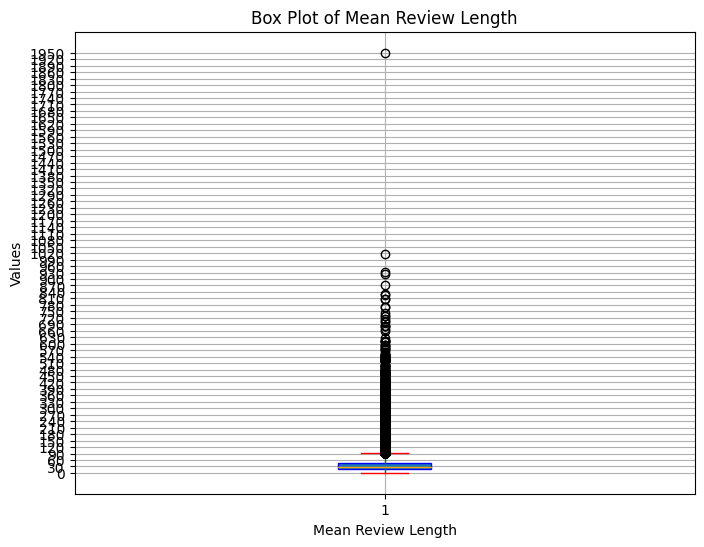

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df["Review_length"] contains the review lengths
data = df["Review_length"]

plt.figure(figsize=(8, 6))  # Adjust size as needed

# Customizing box plot colors
boxprops = dict(color="blue")
whiskerprops = dict(color="green")
capprops = dict(color="red")
medianprops = dict(color="orange")

plt.boxplot(data, vert=True, patch_artist=True,
            boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, medianprops=medianprops)

plt.title("Box Plot of Mean Review Length")
plt.xlabel("Mean Review Length")
plt.ylabel("Values")
plt.grid(True)

# Set y-axis ticks in increments of 10
plt.yticks(np.arange(0, max(data) + 20, 30))

plt.show()


In [32]:
df["Review_length"].mean()

38.61781

In [33]:
df["Score"].value_counts()

Score
5    127956
4     28284
1     18411
3     14878
2     10471
Name: count, dtype: int64

In [34]:
d = {1:0,2:0,3:0,4:1,5:1}

df["Label"] = df["Score"].apply(lambda x :d[x])

In [35]:
df["Label"].value_counts()

Label
1    156240
0     43760
Name: count, dtype: int64

In [36]:

labels = df['Label'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["Preprocessed Review"],labels, test_size=0.2, random_state=None)


In [37]:
max_len = 40
trunc_type = "post"
padding_type = "pre"
oov_tok = "<OOV>"

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
token = Tokenizer( char_level=False, oov_token = oov_tok) # oov_token is used for out of vocabulary
token.fit_on_texts(X_train)

In [40]:
vocab_size = len(token.word_index)+1 

In [41]:
x_train_seq = token.texts_to_sequences(X_train)
train_pad_seq = pad_sequences (x_train_seq, maxlen = max_len, padding = padding_type, truncating = trunc_type )
x_test_seq = token.texts_to_sequences(X_test)
test_pad_seq = pad_sequences(x_test_seq, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [42]:
print('Shape of training reviews: ', train_pad_seq.shape)
print('Shape of testing reviews: ', test_pad_seq.shape)

Shape of training reviews:  (160000, 40)
Shape of testing reviews:  (40000, 40)


In [43]:
print('Actual Review:\n',X_train.iloc[5])
print('\ntweet sentence represented in terms of tokens and not padded :\n ',x_train_seq[5])
print('\nAfter padding : \n',train_pad_seq[5])

Actual Review:
 could possibly best tasting chip ever eaten nice smokey bacon flavor would make sure item always stocked pantry price high amount get would sell amazing chip states would highly recomend someone paying price one time try

tweet sentence represented in terms of tokens and not padded :
  [38, 1908, 23, 184, 471, 102, 554, 65, 2648, 1108, 10, 8, 29, 112, 260, 79, 2418, 1174, 24, 118, 196, 14, 8, 754, 330, 471, 1217, 8, 171, 3657, 499, 1118, 24, 4, 20, 33]

After padding : 
 [   0    0    0    0   38 1908   23  184  471  102  554   65 2648 1108
   10    8   29  112  260   79 2418 1174   24  118  196   14    8  754
  330  471 1217    8  171 3657  499 1118   24    4   20   33]


In [44]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import classification_report

In [45]:
num_epochs = 10

In [46]:
n_lstm=128
embeding_dim =128
drop_lstm =0.2
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim))
model.add(LSTM(n_lstm, dropout=drop_lstm,return_sequences=False))

model.add(Dense(2, activation='softmax'))
# model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/10
5000/5000 - 770s - loss: 0.3060 - accuracy: 0.8706 - val_loss: 0.2662 - val_accuracy: 0.8912 - 770s/epoch - 154ms/step
Epoch 2/10
5000/5000 - 768s - loss: 0.2217 - accuracy: 0.9105 - val_loss: 0.2633 - val_accuracy: 0.8952 - 768s/epoch - 154ms/step
Epoch 3/10
5000/5000 - 770s - loss: 0.1669 - accuracy: 0.9344 - val_loss: 0.2816 - val_accuracy: 0.8909 - 770s/epoch - 154ms/step
Epoch 4/10
5000/5000 - 769s - loss: 0.1205 - accuracy: 0.9536 - val_loss: 0.3108 - val_accuracy: 0.8918 - 769s/epoch - 154ms/step
Epoch 5/10
5000/5000 - 771s - loss: 0.0836 - accuracy: 0.9689 - val_loss: 0.3735 - val_accuracy: 0.8938 - 771s/epoch - 154ms/step
Epoch 6/10
5000/5000 - 770s - loss: 0.0575 - accuracy: 0.9789 - val_loss: 0.4278 - val_accuracy: 0.8927 - 770s/epoch - 154ms/step
Epoch 7/10
5000/5000 - 770s - loss: 0.0405 - accuracy: 0.9851 - val_loss: 0.4790 - val_accuracy: 0.8893 - 770s/epoch - 154ms/step
Epoch 8/10
5000/5000 - 769s - loss: 0.0292 - accuracy: 0.9896 - val_loss: 0.5420 - val_acc

Training Results
              precision    recall  f1-score   support

           0     0.9966    0.9925    0.9946     34958
           1     0.9979    0.9991    0.9985    125042

    accuracy                         0.9976    160000
   macro avg     0.9973    0.9958    0.9965    160000
weighted avg     0.9976    0.9976    0.9976    160000



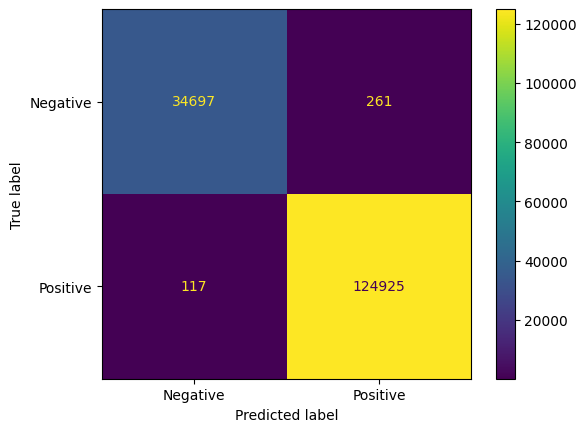

Testing Results
              precision    recall  f1-score   support

           0     0.7715    0.7349    0.7528      8802
           1     0.9262    0.9386    0.9324     31198

    accuracy                         0.8938     40000
   macro avg     0.8489    0.8368    0.8426     40000
weighted avg     0.8922    0.8938    0.8928     40000



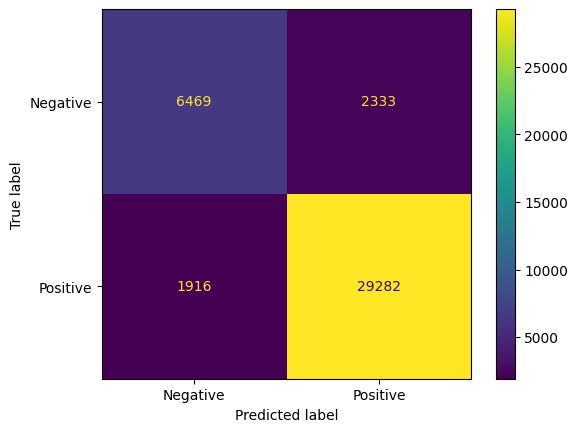

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()
model.save_weights("lstm_w.h5")
model.save("lstm.h5")

## BI-LSTM

In [48]:
n_lstm=128
embeding_dim =128
drop_lstm =0.2
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))

model2.add(Dense(2, activation='softmax'))
# model.summary()

model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model2.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/10
5000/5000 - 1270s - loss: 0.3033 - accuracy: 0.8743 - val_loss: 0.2666 - val_accuracy: 0.8928 - 1270s/epoch - 254ms/step
Epoch 2/10
5000/5000 - 1256s - loss: 0.2157 - accuracy: 0.9138 - val_loss: 0.2573 - val_accuracy: 0.8967 - 1256s/epoch - 251ms/step
Epoch 3/10
5000/5000 - 1255s - loss: 0.1572 - accuracy: 0.9390 - val_loss: 0.2727 - val_accuracy: 0.8944 - 1255s/epoch - 251ms/step
Epoch 4/10
5000/5000 - 1279s - loss: 0.1080 - accuracy: 0.9594 - val_loss: 0.3216 - val_accuracy: 0.8963 - 1279s/epoch - 256ms/step
Epoch 5/10
5000/5000 - 1269s - loss: 0.0712 - accuracy: 0.9739 - val_loss: 0.3689 - val_accuracy: 0.8922 - 1269s/epoch - 254ms/step
Epoch 6/10
5000/5000 - 1245s - loss: 0.0489 - accuracy: 0.9824 - val_loss: 0.4655 - val_accuracy: 0.8877 - 1245s/epoch - 249ms/step
Epoch 7/10
5000/5000 - 1250s - loss: 0.0338 - accuracy: 0.9880 - val_loss: 0.5497 - val_accuracy: 0.8921 - 1250s/epoch - 250ms/step
Epoch 8/10
5000/5000 - 1252s - loss: 0.0263 - accuracy: 0.9908 - val_loss: 0

Training Results
              precision    recall  f1-score   support

           0     0.9983    0.9916    0.9949     34958
           1     0.9977    0.9995    0.9986    125042

    accuracy                         0.9978    160000
   macro avg     0.9980    0.9956    0.9968    160000
weighted avg     0.9978    0.9978    0.9978    160000



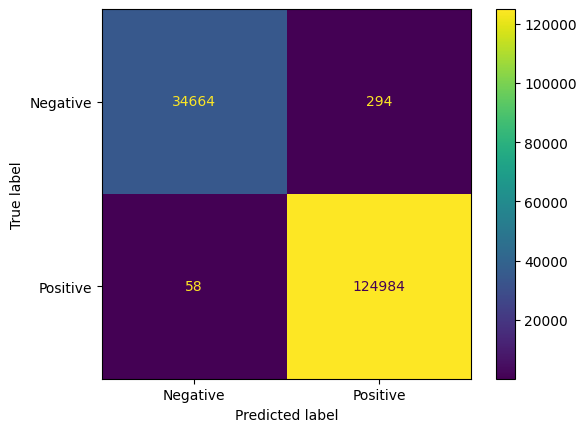

Testing Results
              precision    recall  f1-score   support

           0     0.7797    0.7142    0.7455      8802
           1     0.9212    0.9431    0.9320     31198

    accuracy                         0.8927     40000
   macro avg     0.8505    0.8286    0.8388     40000
weighted avg     0.8901    0.8927    0.8910     40000



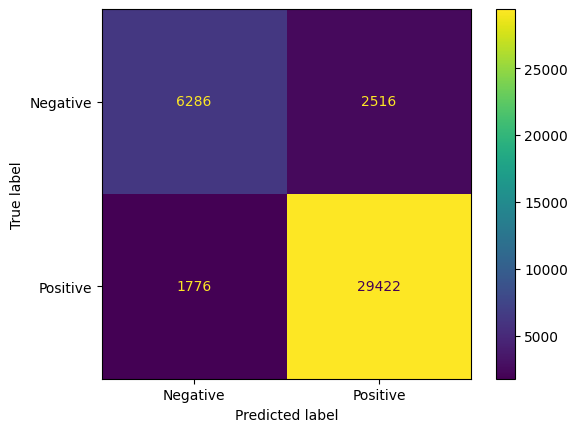

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model2.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model2.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()
model.save_weights("bi_lstm_w.h5")
model.save("bi_lstm.h5")

### CNN

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Define the model
model3 = Sequential()
model3.add(Embedding(vocab_size, embeding_dim, input_length=max_len))  # Assuming max_length is defined
model3.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))  # Specify input_shape here
model3.add(Dense(2, activation='softmax'))

# Compile the model
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model3.fit(train_pad_seq, Y_train, epochs=num_epochs, validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/10
5000/5000 - 596s - loss: 0.2952 - accuracy: 0.8758 - val_loss: 0.2608 - val_accuracy: 0.8949 - 596s/epoch - 119ms/step
Epoch 2/10
5000/5000 - 587s - loss: 0.1698 - accuracy: 0.9336 - val_loss: 0.2695 - val_accuracy: 0.8977 - 587s/epoch - 117ms/step
Epoch 3/10
5000/5000 - 587s - loss: 0.0730 - accuracy: 0.9733 - val_loss: 0.4068 - val_accuracy: 0.8954 - 587s/epoch - 117ms/step
Epoch 4/10
5000/5000 - 584s - loss: 0.0372 - accuracy: 0.9867 - val_loss: 0.5148 - val_accuracy: 0.8814 - 584s/epoch - 117ms/step
Epoch 5/10
5000/5000 - 592s - loss: 0.0249 - accuracy: 0.9911 - val_loss: 0.6116 - val_accuracy: 0.8913 - 592s/epoch - 118ms/step
Epoch 6/10
5000/5000 - 593s - loss: 0.0181 - accuracy: 0.9937 - val_loss: 0.7030 - val_accuracy: 0.8925 - 593s/epoch - 119ms/step
Epoch 7/10
5000/5000 - 594s - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.7576 - val_accuracy: 0.8917 - 594s/epoch - 119ms/step
Epoch 8/10
5000/5000 - 593s - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.8929 - val_acc

Training Results
              precision    recall  f1-score   support

           0     0.9966    0.9958    0.9962     34958
           1     0.9988    0.9990    0.9989    125042

    accuracy                         0.9983    160000
   macro avg     0.9977    0.9974    0.9976    160000
weighted avg     0.9983    0.9983    0.9983    160000



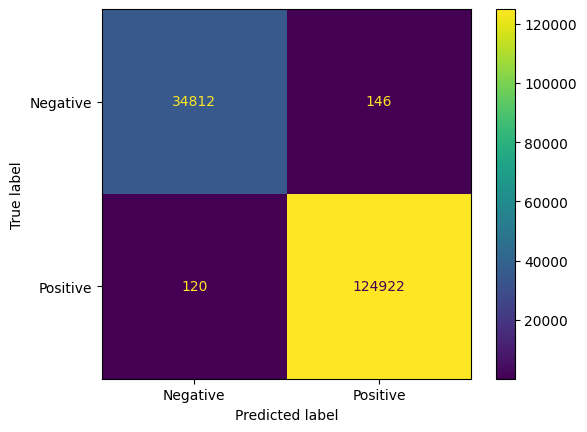

Testing Results
              precision    recall  f1-score   support

           0     0.7581    0.7227    0.7400      8802
           1     0.9228    0.9349    0.9288     31198

    accuracy                         0.8882     40000
   macro avg     0.8404    0.8288    0.8344     40000
weighted avg     0.8865    0.8882    0.8873     40000



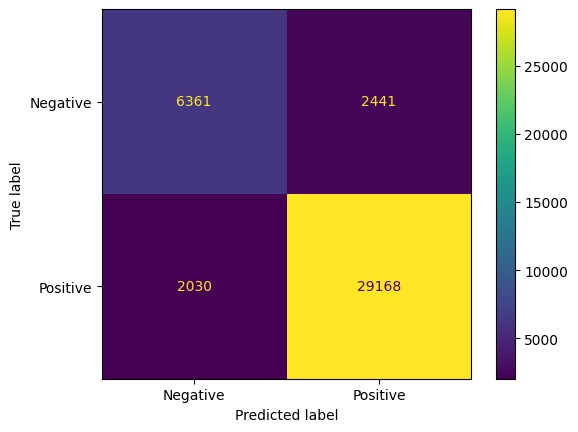

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model3.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model3.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()
model.save_weights("cnn_w.h5")
model.save("cnn.h5")

### CNN + LSTM

In [52]:
from tensorflow.keras.layers import Conv1D,MaxPooling1D

n_lstm=128
embeding_dim =128
drop_lstm =0.2

model4 = Sequential()
model4.add(Embedding(vocab_size, embeding_dim))
model4.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(LSTM(n_lstm, dropout=drop_lstm))
model4.add(Dense(2, activation='softmax'))


model4.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model4.fit(train_pad_seq,Y_train, epochs=num_epochs,validation_data=(test_pad_seq, Y_test), verbose=2)

Epoch 1/10
5000/5000 - 620s - loss: 0.3053 - accuracy: 0.8713 - val_loss: 0.2660 - val_accuracy: 0.8945 - 620s/epoch - 124ms/step
Epoch 2/10
5000/5000 - 626s - loss: 0.2180 - accuracy: 0.9128 - val_loss: 0.2612 - val_accuracy: 0.8979 - 626s/epoch - 125ms/step
Epoch 3/10
5000/5000 - 619s - loss: 0.1519 - accuracy: 0.9416 - val_loss: 0.2842 - val_accuracy: 0.8925 - 619s/epoch - 124ms/step
Epoch 4/10
5000/5000 - 618s - loss: 0.1055 - accuracy: 0.9612 - val_loss: 0.3255 - val_accuracy: 0.8992 - 618s/epoch - 124ms/step
Epoch 5/10
5000/5000 - 618s - loss: 0.0764 - accuracy: 0.9717 - val_loss: 0.3743 - val_accuracy: 0.8974 - 618s/epoch - 124ms/step
Epoch 6/10
5000/5000 - 621s - loss: 0.0569 - accuracy: 0.9793 - val_loss: 0.4080 - val_accuracy: 0.8949 - 621s/epoch - 124ms/step
Epoch 7/10
5000/5000 - 616s - loss: 0.0460 - accuracy: 0.9832 - val_loss: 0.4446 - val_accuracy: 0.8925 - 616s/epoch - 123ms/step
Epoch 8/10
5000/5000 - 610s - loss: 0.0367 - accuracy: 0.9868 - val_loss: 0.4543 - val_acc

Training Results
              precision    recall  f1-score   support

           0     0.9954    0.9924    0.9939     34958
           1     0.9979    0.9987    0.9983    125042

    accuracy                         0.9974    160000
   macro avg     0.9967    0.9956    0.9961    160000
weighted avg     0.9974    0.9974    0.9974    160000



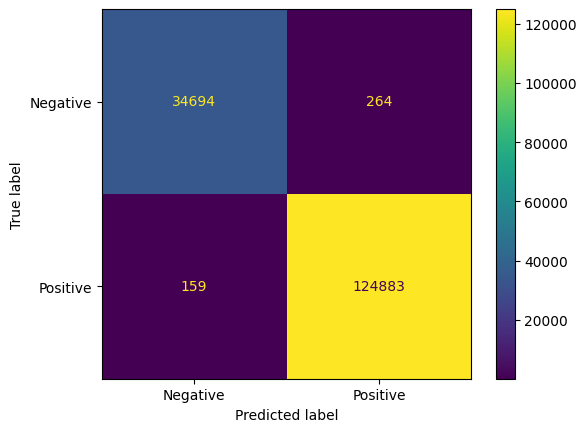

Testing Results
              precision    recall  f1-score   support

           0     0.7526    0.7334    0.7429      8802
           1     0.9253    0.9320    0.9286     31198

    accuracy                         0.8883     40000
   macro avg     0.8390    0.8327    0.8357     40000
weighted avg     0.8873    0.8883    0.8878     40000



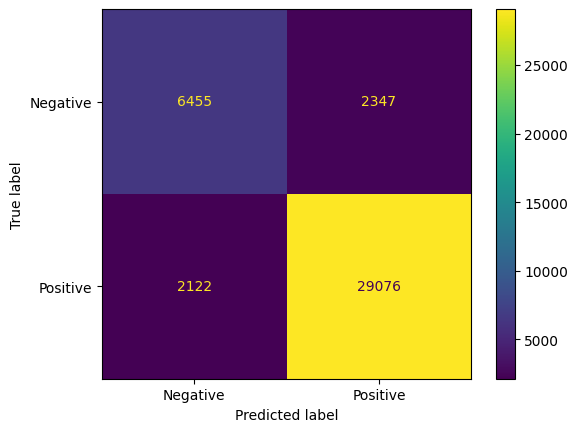

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Training Results")
yhat_probs = model4.predict(train_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_train, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_train, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()

print("Testing Results")
yhat_probs = model4.predict(test_pad_seq, verbose=0)
pred =  np.argmax(yhat_probs, axis=1)
matrix = classification_report(Y_test, pred,digits =4)
print(matrix)

cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Negative","Positive"])
disp.plot()
plt.show()
model.save_weights("cnn_lstm_w.h5")
model.save("cnn_lstm.h5")